# **Import libraries**

In [2]:
# Import libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coffee-bean-sales-dataset/saudi_cities_geocoding.csv
/kaggle/input/coffee-bean-sales-dataset/DatasetForCoffeeSales2.csv


# **Load & Explore Data**

In [4]:
#Download and Read the csv file
df = pd.read_csv('/kaggle/input/coffee-bean-sales-dataset/DatasetForCoffeeSales2.csv', sep=',')

In [5]:
df.head()

,Date,Customer_ID,City,Category,Product,Unit Price,Quantity,Sales Amount,Used_Discount,Discount_Amount,Final Sales
0,1/1/2023,32,Riyadh,coffee beans,Colombian,40,14,560,False,0,560
1,1/2/2023,49,Abha,coffee beans,Costa Rica,35,17,595,False,0,595
2,1/3/2023,75,Tabuk,coffee beans,Costa Rica,35,19,665,False,0,665
3,1/4/2023,80,Abha,coffee beans,Ethiopian,45,1,45,False,0,45
4,1/5/2023,78,Hail,coffee beans,Colombian,40,46,1840,True,368,1472


In [6]:
# Get the shape of the DataFrame
df.shape

(730, 11)

In [7]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             730 non-null    object
 1   Customer_ID      730 non-null    int64 
 2   City             730 non-null    object
 3   Category         730 non-null    object
 4   Product          730 non-null    object
 5   Unit Price       730 non-null    int64 
 6   Quantity         730 non-null    int64 
 7   Sales Amount     730 non-null    int64 
 8   Used_Discount    730 non-null    bool  
 9   Discount_Amount  730 non-null    int64 
 10  Final Sales      730 non-null    int64 
dtypes: bool(1), int64(6), object(4)
memory usage: 57.9+ KB


In [10]:
df.describe()

,Customer_ID,Unit Price,Quantity,Sales Amount,Discount_Amount,Final Sales
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,51.669863,36.794521,26.080822,959.924658,97.393151,862.531507
std,29.014339,4.955104,14.480971,551.282730,123.401350,509.032315
min,1.000000,30.000000,1.000000,30.000000,0.000000,24.000000
25%,27.250000,35.000000,14.000000,495.000000,0.000000,448.000000
50%,52.000000,35.000000,27.000000,960.000000,13.000000,840.000000
75%,77.000000,40.000000,39.000000,1400.000000,192.000000,1260.000000
max,100.000000,45.000000,49.000000,2205.000000,441.000000,2205.000000


# **Clean Data**

In [11]:
# Duplicate rows
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Date               0
Customer_ID        0
City               0
Category           0
Product            0
Unit Price         0
Quantity           0
Sales Amount       0
Used_Discount      0
Discount_Amount    0
Final Sales        0
dtype: int64

In [14]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])
print(df["Date"])

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
725   2024-12-26
726   2024-12-27
727   2024-12-28
728   2024-12-29
729   2024-12-30
Name: Date, Length: 730, dtype: datetime64[ns]


# **Analysis and Data Visualization**

# Sales Performance Over Time

In [43]:
# Aggregate sales per year
df_yearly = df.groupby(df["Date"].dt.to_period("Y"))["Final Sales"].sum()
df_yearly

Date
2023    313149
2024    316499
Freq: Y-DEC, Name: Final Sales, dtype: int64

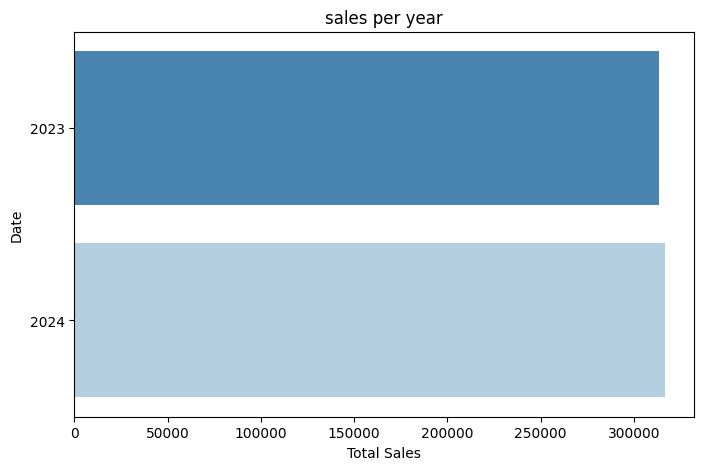

In [44]:
# Plot sales per year
plt.figure(figsize=(8,5))
sns.barplot(x=df_yearly.values, y=df_yearly.index, palette="Blues_r")
plt.title("sales per year")
plt.xlabel("Total Sales")
plt.show()

In [16]:
# Aggregate sales per month
df_monthly = df.groupby(df["Date"].dt.to_period("M"))["Final Sales"].sum()
df_monthly

Date
2023-01    26056
2023-02    23757
2023-03    32211
2023-04    24284
2023-05    25901
2023-06    27964
2023-07    26673
2023-08    27663
2023-09    24667
2023-10    25640
2023-11    24767
2023-12    23566
2024-01    26018
2024-02    27694
2024-03    24308
2024-04    23598
2024-05    25674
2024-06    29244
2024-07    29549
2024-08    27268
2024-09    28753
2024-10    21792
2024-11    26802
2024-12    25799
Freq: M, Name: Final Sales, dtype: int64

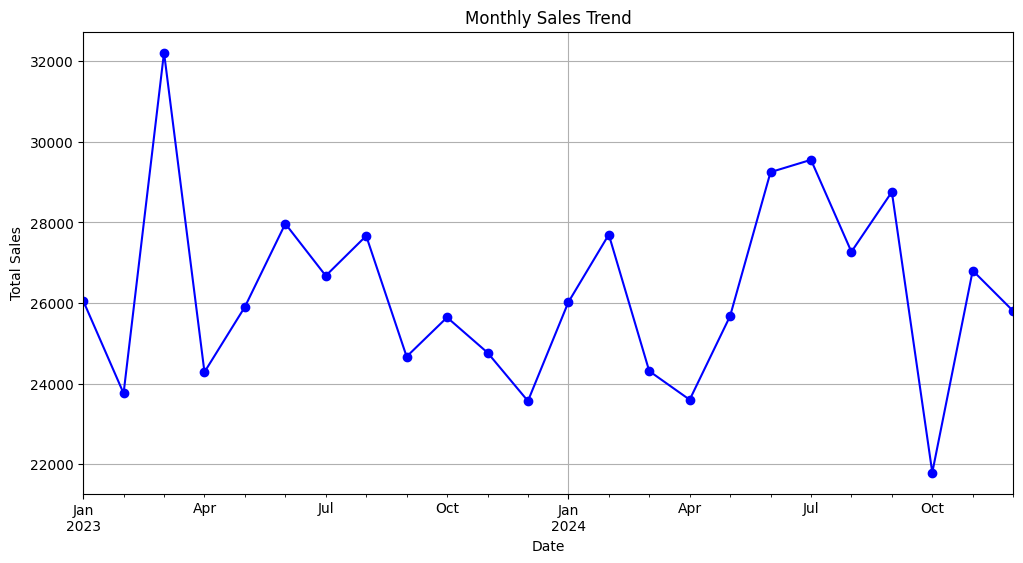

In [17]:
# Plot sales trend
plt.figure(figsize=(12,6))
df_monthly.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Best-Selling Products

In [19]:
# Aggregate sales by product
top_products = df.groupby("Product")["Final Sales"].sum().sort_values(ascending=False)
top_products


Product
Colombian     144776
Costa Rica    141078
Ethiopian     134154
Guatemala     106806
Brazilian     102834
Name: Final Sales, dtype: int64

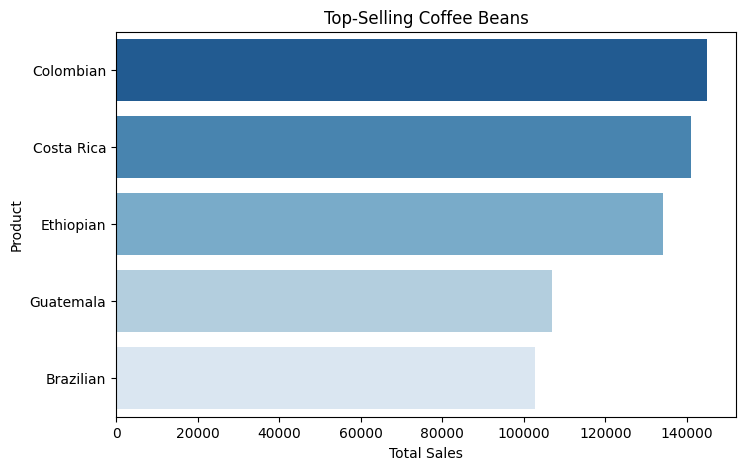

In [20]:
# Plot Top Products
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title("Top-Selling Coffee Beans")
plt.xlabel("Total Sales")
plt.show()

In [45]:
# Aggregate Quantity soled by product
Quantity_products = df.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
Quantity_products

Product
Costa Rica    4452
Colombian     4072
Brazilian     3792
Guatemala     3425
Ethiopian     3298
Name: Quantity, dtype: int64

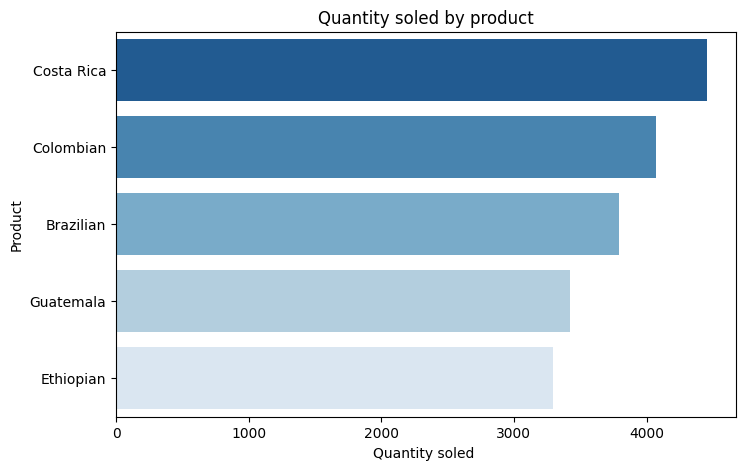

In [46]:
# Plot Quantity soled by product
plt.figure(figsize=(8,5))
sns.barplot(x=Quantity_products.values, y=Quantity_products.index, palette="Blues_r")
plt.title("Quantity soled by product")
plt.xlabel("Quantity soled ")
plt.show()

# Top customers

In [26]:
#Top customers by total purchases.
top_customers = df.groupby("Customer_ID")["Final Sales"].sum().sort_values(ascending=False)
top_10_customers = top_customers.head(10)

top_10_customers

Customer_ID
2     14334
97    13602
82    12932
81    11903
50    11285
45    10910
60    10622
9     10094
72     9930
91     9731
Name: Final Sales, dtype: int64

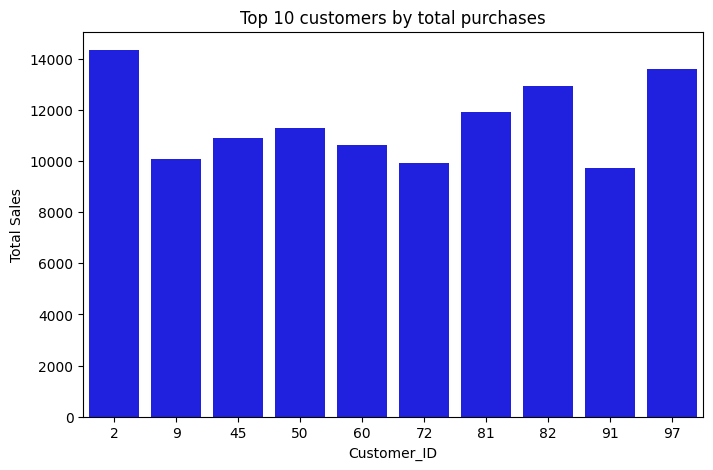

In [34]:
# Plot Top Customers by total purchases
plt.figure(figsize=(8,5))
sns.barplot(x=top_10_customers.index, y=top_10_customers.values, color="Blue")
plt.title("Top 10 customers by total purchases")
plt.ylabel("Total Sales")
plt.show()

# Customer retention: How often do they buy?

In [41]:
Purchase_Frequency = df.groupby("Customer_ID")["Customer_ID"].count().sort_values(ascending=False)
top_10_Purchase_Frequency=Purchase_Frequency.head(10)
top_10_Purchase_Frequency

Customer_ID
82    15
2     15
97    13
47    12
57    11
83    11
66    11
90    11
4     11
60    11
Name: Customer_ID, dtype: int64

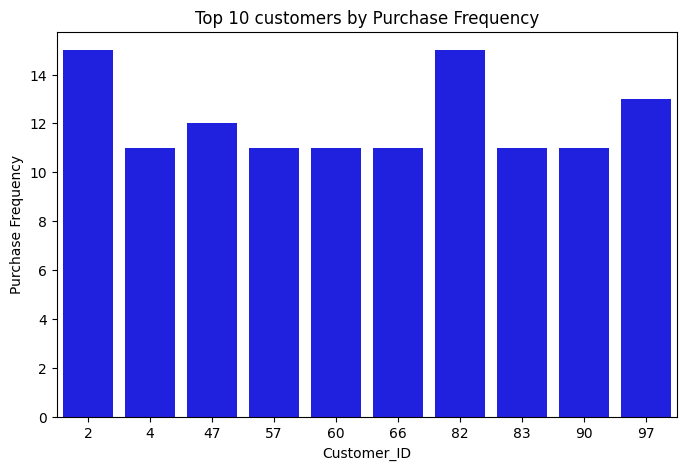

In [42]:
# Plot Top 10 Customers by Purchase Frequency
plt.figure(figsize=(8,5))
sns.barplot(x=top_10_Purchase_Frequency.index, y=top_10_Purchase_Frequency.values, color="Blue")
plt.title("Top 10 customers by Purchase Frequency")
plt.ylabel("Purchase Frequency")
plt.show()

# Discount Analysis

In [21]:
# Compare sales with and without discounts
discount_usage = df.groupby("Used_Discount")["Final Sales"].sum()
discount_usage

Used_Discount
False    345260
True     284388
Name: Final Sales, dtype: int64

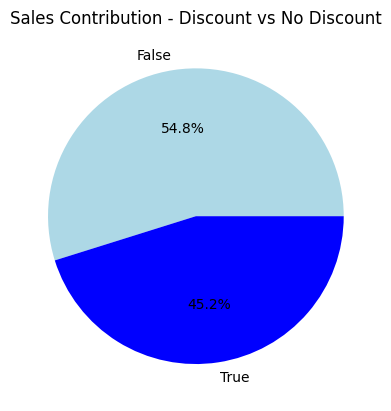

In [23]:
# Pie chart
discount_usage.plot(kind="pie", autopct="%1.1f%%", colors=["lightblue", "blue"])
plt.title("Sales Contribution - Discount vs No Discount")
plt.ylabel("")
plt.show()

# Top City by total sales.

In [49]:
#the Total Sales by Citys
CitysTotalSales = df.groupby(['City'])['Final Sales'].sum().sort_values(ascending=False)
CitysTotalSales


City
Hail        77257
Jeddah      72048
Riyadh      68421
Mecca       66420
Medina      64813
Khobar      59989
Dammam      59975
Buraidah    56875
Abha        52831
Tabuk       51019
Name: Final Sales, dtype: int64

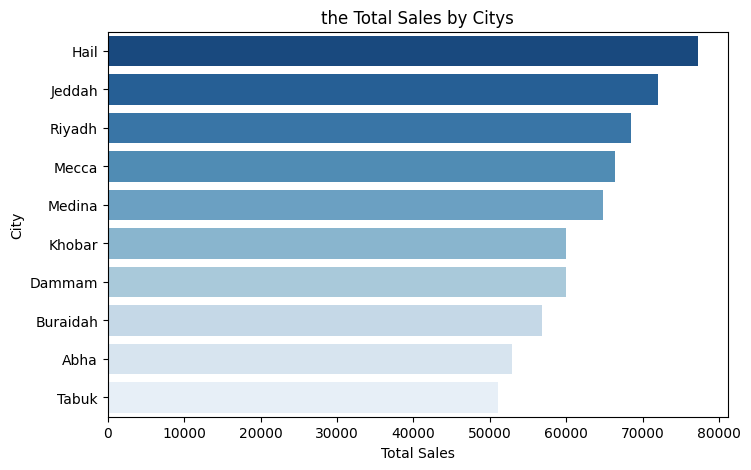

In [50]:
#plot the Total Sales by Citys
plt.figure(figsize=(8,5))
sns.barplot(x=CitysTotalSales.values, y=CitysTotalSales.index, palette="Blues_r")
plt.title("the Total Sales by Citys")
plt.xlabel("Total Sales")
plt.show()

# Where Are Most Customers From?

In [54]:
#Where Are Most Customers From
Customer_Locations = df.groupby(['City'])['Customer_ID'].count().sort_values(ascending=False)
Customer_Locations

City
Hail        87
Riyadh      79
Jeddah      77
Mecca       77
Khobar      73
Dammam      72
Medina      71
Buraidah    69
Abha        66
Tabuk       59
Name: Customer_ID, dtype: int64

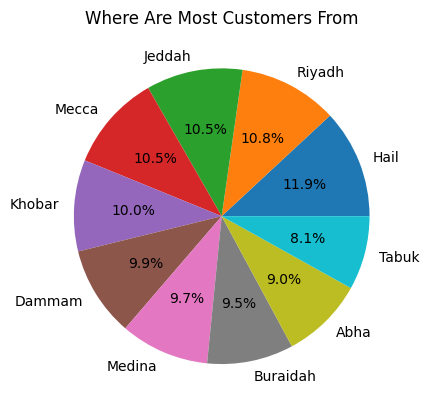

In [57]:
# Pie chart
Customer_Locations.plot(kind="pie", autopct="%1.1f%%")
plt.title("Where Are Most Customers From")
plt.ylabel("")
plt.show()

# **Sales Forecasting**

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [67]:
# Aggregate sales per month
df_monthly = df.groupby(df["Date"].dt.to_period("M"))["Final Sales"].sum().reset_index()
df_monthly["Date"] = df_monthly["Date"].astype(str)  # Convert period to string
df_monthly["Date"] = pd.to_datetime(df_monthly["Date"])  # Convert back to datetime

# Create time index
df_monthly["Month_Index"] = np.arange(len(df_monthly))

MAE: 1773.47
RMSE: 2374.30


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-68-31b9bd3cc23f>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df_monthly["Date"].max(), periods=7, freq="M")[1:]


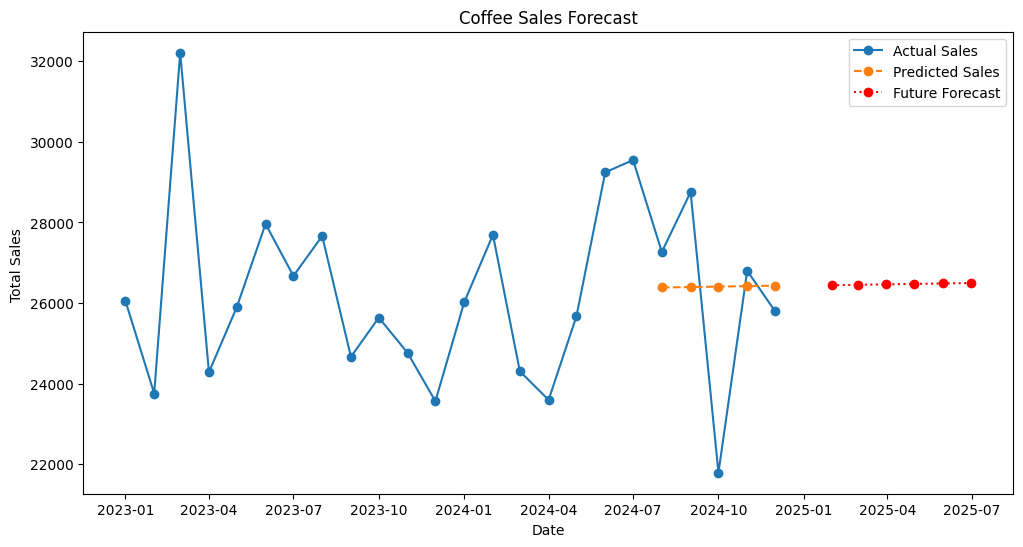

In [68]:
# Split into train and test sets
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly.iloc[:train_size], df_monthly.iloc[train_size:]

# Features & target
X_train, y_train = train[["Month_Index"]], train["Final Sales"]
X_test, y_test = test[["Month_Index"]], test["Final Sales"]

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future sales
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Predict next 6 months
future_index = np.arange(len(df_monthly), len(df_monthly) + 6).reshape(-1, 1)
future_sales = model.predict(future_index)

# Create future dates
future_dates = pd.date_range(df_monthly["Date"].max(), periods=7, freq="M")[1:]

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df_monthly["Date"], df_monthly["Final Sales"], label="Actual Sales", marker="o")
plt.plot(test["Date"], y_pred, label="Predicted Sales", linestyle="dashed", marker="o")
plt.plot(future_dates, future_sales, label="Future Forecast", linestyle="dotted", marker="o", color="red")
plt.xlabel("Date")
plt.ylabel("Total Sales ")
plt.title("Coffee Sales Forecast")
plt.legend()
plt.show()